#### SUMMARY STATISTICS
# Life Expectancy By Country

Over the course of the past few centuries, technological and medical advancements have helped increase the life expectancy of humans. However, as of now, the average life expectancy of humans varies depending on what country you live in.

In this project, we will investigate a dataset containing information about the average life expectancy in 158 different countries. We will specifically look at how a country’s economic success might impact the life expectancy in that area.
***

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Looking at the data

In [97]:
data = pd.read_csv('data.csv')
quartiles = [0.25,0.55,0.75]
display(data.head())

,Country,Life Expectancy,GDP
0,Afghanistan,58.19375,340.015425
1,Albania,75.15625,2119.726679
2,Algeria,73.61875,2847.853392
3,Angola,49.01875,1975.143045
4,Antigua and Barbuda,75.05625,9759.305728


Let’s isolate the column that contains the life expectancy and store it in a variable named `life_expectancy`

In [98]:
life_expectancy = data["Life Expectancy"]

***
## Find the Quantiles

Let’s use the `np.quantile()` function to find the quartiles of `life_expectancy`. 

In [99]:
life_expectancy_quartiles = np.quantile(life_expectancy, quartiles)
display(life_expectancy_quartiles)

array([62.325    , 73.13     , 75.4421875])

***
## Splitting the Data by GDP
*GDP is a mesaure of a country’s wealth*

**Let’s now use the GDP data to see if life expectancy is affected by this value.**

Let’s split the data into two groups based on GDP. If we find the median GDP, we can create two datasets for “low GDP countries” and “high GDP countries.

1. **To start, let’s isolate the GDP column and store it in a variable named gdp**

In [101]:
gdp = data["GDP"]

2. **We now want to find the median GDP.**

In [102]:
median_gdp = np.quantile(gdp,0.5)

3. **Let’s now grab all of the rows from our original dataset that have a GDP less than or equal to the median**

In [103]:
low_gdp = data[data['GDP'] <= median_gdp]
high_gdp = data[data['GDP'] > median_gdp]

display(low_gdp.head(5),high_gdp.head(5))

,Country,Life Expectancy,GDP
0,Afghanistan,58.19375,340.015425
1,Albania,75.15625,2119.726679
2,Algeria,73.61875,2847.853392
3,Angola,49.01875,1975.143045
6,Armenia,73.40000,1999.986318


,Country,Life Expectancy,GDP
4,Antigua and Barbuda,75.05625,9759.305728
5,Argentina,75.15625,6998.575103
7,Australia,81.81250,34637.565047
8,Austria,81.48125,33827.476309
9,Azerbaijan,70.73125,3302.947807


4. **Find the quartiles of the "Life Expectancy" column of `low_gdp` and `high_gdp`**

In [104]:
low_gdp_quartiles = np.quantile(low_gdp["Life Expectancy"], quartiles)
high_gdp_quartiles = np.quantile(high_gdp["Life Expectancy"], quartiles)
print(f"Quarters of Low Life Expectancy by GPD: {low_gdp_quartiles} \nQuarters of High Life Expectancy by GPD : {high_gdp_quartiles}")

Quarters of Low Life Expectancy by GPD: [56.3375   65.110625 71.7375  ] 
Quarters of High Life Expectancy by GPD : [72.965625 75.716875 80.521875]


***
## Histogram and Conclusions

By looking at the quantiles, you should get a sense of the spread and central tendency of these two datasets. But let’s plot a histogram of each dataset to really compare them.

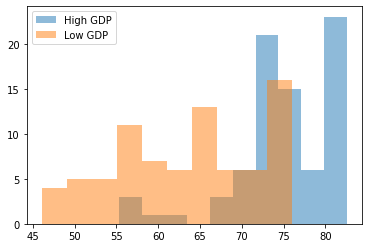

In [105]:
plt.hist(high_gdp["Life Expectancy"], alpha = 0.5, label = "High GDP")
plt.hist(low_gdp["Life Expectancy"], alpha = 0.5, label = "Low GDP")
plt.legend()
plt.show()

*We can now truly see the impact GDP has on life expectancy.*

**Once again, consider a country that has a life expectancy of 70 years. If that country is in the top half of GDP countries, is it in the first, second, third, or fourth quarter of the data with respect to life expectancy? What if the country is in the bottom half of GDP countries?**

**Answer:**  
`70` is below the first quartile of the high GDP dataset, so it falls in the first quarter of that dataset.<br>
`70` is between the second and third quartile of the low GDP dataset, so it falls in the third quarter.